In [1]:
from Data import Data
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
def make_components_plot(dset1, dset2, dset3, 
                         lgd1='', lgd2='', lgd3='', 
                         mem1=False, mem2=False, mem3=False,
                         filename=None): 
    
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)
    fig.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    
    dfs1 = dset1.all_process_dataframe()
    dfs2 = dset2.all_process_dataframe()
    dfs3 = dset3.all_process_dataframe()
    
    dfs = (dfs1, dfs2, dfs3)
    mems = (mem1, mem2, mem3)
    colors = ('black', 'blue', 'red')
    
    for i, (dframe, color) in enumerate(zip(dfs, colors)):
        
        if mems[i] == False:
            dframe[0].loc[:, 'IO'].plot(color=color,
                                        yerr=dframe[1].loc[:, 'IO'].to_numpy(),
                                        ax=axes[0,0],
                                        title='I/O',
                                        xticks=(1, 28, 56, 112),
                                        xlim=[0,120],
                                        yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                        ylim=[1e-4, 1e4],
                                        logy=True,
                                        xlabel='',
                                        marker='.')

        elif mems[i] == True:
            dframe[0].loc[:, 'Copy_to_Memory'].plot(color=color,
                                                    yerr=dframe[1].loc[:, 'Copy_to_Memory'].to_numpy(),
                                                    ax=axes[0,0],
                                                    title='I/O',
                                                    xticks=(1, 28, 56, 112),
                                                    xlim=[0,120],
                                                    yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                                    ylim=[1e-4, 1e4],
                                                    logy=True,
                                                    xlabel='',
                                                    marker='.')

        dframe[0].loc[:, 'RMSD'].plot(color=color,
                                      yerr=dframe[1].loc[:, 'RMSD'].to_numpy(),
                                      ax=axes[0,1],
                                      title='RMSD',
                                      xticks=(1, 28, 56, 112),
                                      xlim=[0,120],
                                      yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                      ylim=[1e-4, 1e4],
                                      logy=True,
                                      marker='.')

        dframe[0].loc[2:, 'Wait'].plot(color=color,
                                      yerr=dframe[1].loc[2:, 'Wait'].to_numpy(),
                                      ax=axes[0,2],
                                      title='Wait',
                                      xticks=(1, 28, 56, 112),
                                      xlim=[0,120],
                                      yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                      ylim=[1e-4, 1e4],
                                      logy=True,
                                      xlabel='',
                                      marker='.')

        dframe[0].loc[:, 'Initialize_Topology'].plot(color=color,
                                      yerr=dframe[1].loc[:, 'Initialize_Topology'].to_numpy(),
                                      ax=axes[1,0],
                                      title='Initialize Topology',
                                      xticks=(1, 28, 56, 112),
                                      xlim=[0,120],
                                      yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                      ylim=[1e-4, 1e4],
                                      logy=True,
                                      xlabel='',
                                      marker='.')

        dframe[0].loc[:, 'Initialize_Trajectory'].plot(color=color,
                                                       yerr=dframe[1].loc[:, 'Initialize_Trajectory'].to_numpy(),
                                                       ax=axes[1,1],
                                                       title='Initialize Trajectory',
                                                       xticks=(1, 28, 56, 112),
                                                       xlim=[0,120],
                                                       yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                                       ylim=[1e-4, 1e4],
                                                       logy=True,
                                                       xlabel='',
                                                       marker='.')

        dframe[0].loc[:, 'Comm_Gather'].plot(color=color,
                                             yerr=dframe[1].loc[:, 'Comm_Gather'].to_numpy(),
                                             ax=axes[1,2],
                                             title='Communication',
                                             xticks=(1, 28, 56, 112),
                                             xlim=[0,120],
                                             yticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4],
                                             ylim=[1e-4, 1e4],
                                             logy=True,
                                             xlabel='',
                                             marker='.')
    
    fig.text(0.5, -0.01, "$N_{Processes}$", ha="center", va="center", fontsize=13)
    fig.text(0, 0.5, "Time(s)", ha="center", va="center", rotation=90, fontsize=13)
    fig.text(0.055, 0.98, 'A', fontsize=12, fontweight="bold")
    fig.text(0.37, 0.98, 'B', fontsize=12, fontweight="bold")
    fig.text(0.7, 0.98, 'C', fontsize=12, fontweight="bold")
    fig.text(0.055, 0.5, 'D', fontsize=12, fontweight="bold")
    fig.text(0.37, 0.5, 'E', fontsize=12, fontweight="bold")
    fig.text(0.7, 0.5, 'F', fontsize=12, fontweight="bold")
    
    lgd = plt.legend([lgd1, lgd2, lgd3],
                      loc='upper center', bbox_to_anchor=(-0.9, -0.4),
                      frameon=False, shadow=False, ncol=6, prop={'size':10})
    
    if filename:
        plt.savefig(filename, bbox_inches="tight")

In [3]:
def make_scaling_plot(dset1, dset2, dset3, lgd1='', lgd2='', lgd3='', mem=False, special=False, filename=None):
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,2.8))
    fig.tight_layout(pad=3.0)

    dsets = (dset1, dset2, dset3)
    colors = ('black', 'blue', 'red')
    
    for dset, color in zip(dsets, colors):
        
        # hack to use correct column
        if (special == True) and (dset == dset3):
            total = dset.all_process_dataframe()[0].loc[:, 'Copy_to_Memory']
            total_err = dset.all_process_dataframe()[1].loc[:, 'Copy_to_Memory']
        else:
            total = dset.all_process_dataframe()[0].loc[:, 'Total_Benchmark_Time']
            total_err = dset.all_process_dataframe()[1].loc[:, 'Total_Benchmark_Time'].to_numpy()

        if mem is True:
            sclIO = dset.scaling()[0].loc[:, 'Copy_to_Memory']
            sclIO_err = dset.scaling()[1].loc[:, 'Copy_to_Memory'].to_numpy()
            effIO = dset.efficiency()[0].loc[:, 'Copy_to_Memory']
            effIO_err = dset.efficiency()[1].loc[:, 'Copy_to_Memory'].to_numpy()
        elif mem is False:
            sclIO = dset.scaling()[0].loc[:, 'IO']
            sclIO_err = dset.scaling()[1].loc[:, 'IO'].to_numpy()
            effIO = dset.efficiency()[0].loc[:, 'IO']
            effIO_err = dset.efficiency()[1].loc[:, 'IO'].to_numpy()

        sclRMSD = dset.scaling()[0].loc[:, 'RMSD']
        sclRMSD_err = dset.scaling()[1].loc[:, 'RMSD'].to_numpy()
        effRMSD = dset.efficiency()[0].loc[:, 'RMSD']
        effRMSD_err = dset.efficiency()[1].loc[:, 'RMSD'].to_numpy()
    
        n = [1, 120]
        

        total.plot(color=color, 
                   yerr=total_err,
                   ax=axes[0], 
                   logy=True, 
                   xlim=(0,120),
                   xticks=(1, 28, 56, 112),
                   xlabel='', 
                   ylim=(1e1,1e4),
                   title='Total Benchmark Time',
                   marker='.')
        sclIO.plot(color=color,
                   yerr=sclIO_err,
                   ax=axes[1],
                   xlim=(0,120),
                   xticks=(1, 28, 56, 112),
                   xlabel='',
                   ylim=(0,120),
                   marker='.',
                   title='Scaling')
        sclRMSD.plot(color=color,
                     yerr=sclRMSD_err, 
                     ax=axes[1], 
                     xlim=(0,120), 
                     xlabel='', 
                     ylim=(0,120), 
                     marker='.', 
                     linestyle='dotted', 
                     label='RMSD')
        axes[1].plot(n, n, 'k--', linewidth='2.5')

        effIO.plot(color=color,
                   yerr=effIO_err,
                   ax=axes[2],
                   xlabel='',
                   xticks=(1, 28, 56, 112),
                   marker='.',
                   title='Efficiency')
        effRMSD.plot(color=color, 
                     yerr=effRMSD_err, 
                     ax=axes[2], 
                     xlabel='', 
                     marker='.', 
                     linestyle='dotted')

    axes[0].set(ylabel='Time(s)')
    axes[1].set(ylabel='$S(N) = t_1/t_N$')
    axes[2].set(ylabel='$E(N) = S(N)/N$')
    
    fig.text(0.5, 0.08, '$N_{Processes}$', ha="center", va="center", fontsize=13)
    fig.text(0.055, 0.92, 'A', fontsize=12, fontweight="bold")
    fig.text(0.37, 0.92, 'B', fontsize=12, fontweight="bold")
    fig.text(0.7, 0.92, 'C', fontsize=12, fontweight="bold")
    
    hpc_lines =   [Line2D([0], [0], color='black', lw=2),
                  Line2D([0], [0], color='blue', lw=2),
                  Line2D([0], [0], color='red', lw=2)]
    hpc_legend = plt.legend(hpc_lines, [lgd1, lgd2, lgd3], loc='upper center', bbox_to_anchor=(-1.6, -0.31),
                            frameon=False, shadow=False, ncol=3, prop={'size':10})
    
    plt.gca().add_artist(hpc_legend)
    
    time_lines = [Line2D([0], [0], color='black', lw=2, linestyle='solid'),
                Line2D([0], [0], color='black', lw=2, linestyle='dotted')]
    
    plt.legend(time_lines, ['IO', 'RMSD'], loc='upper center', bbox_to_anchor=(0.4, -0.20),
                      frameon=False, shadow=False, ncol=1, prop={'size':10})
    
    if filename:
        plt.savefig(filename, bbox_inches="tight")

## Vanilla plots

In [4]:
# didn't save .csv with columns in vanilla runs
columns = ['Rank', 'Total_Initialize', 'Initialize_Topology', 
           'Initialize_Trajectory', 'Open_Trajectory', 'Set_n_atoms',
           'Set_Units', 'IO', 'IO/Frame', 'Copy_Data', 'Copy_Box',
           'Get_Dataset', 'Set_ts_Position', 'Convert_Units',
           'RMSD', 'RMSD/Frame', 'Wait', 'Comm_Gather', 'Close_Trajectory','Total_Benchmark_Time']

Agave_vanilla = Data('../Agave/benchmarks/vanilla/results/run_1', columns=columns)
Bridges_vanilla = Data('../Bridges/benchmarks/vanilla/results/run_1', columns=columns)
Comet_vanilla = Data('../Comet/benchmarks/vanilla/results/run_1', columns=columns)

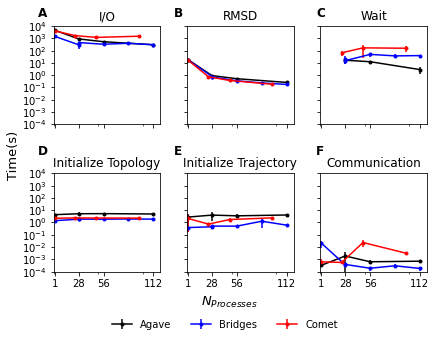

In [5]:
make_components_plot(Agave_vanilla, Bridges_vanilla, Comet_vanilla, 
                     lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                     filename='figs/components-vanilla.pdf')

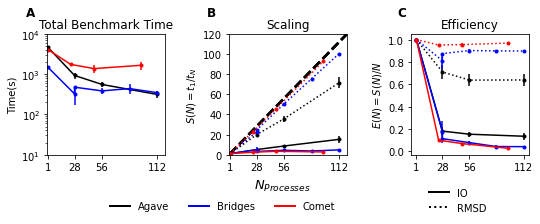

In [6]:
make_scaling_plot(Agave_vanilla, Bridges_vanilla, Comet_vanilla, 
                  lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                  filename='figs/scaling-vanilla.pdf')

## Masked Array plots

In [7]:
cols2 = ['Rank', 'Total_Initialize', 'Initialize_Topology', 
         'Initialize_Trajectory',
         'IO', 'IO/Frame', 'RMSD', 'RMSD/Frame', 
         'Wait', 'Comm_Gather', 'Close_Trajectory','Total_Benchmark_Time']

Agave_masked = Data('../Agave/benchmarks/masked_array/results/run_1', columns=cols2)
Bridges_masked = Data('../Bridges/benchmarks/masked_array/results/run_1', columns=columns)
Comet_masked = Data('../Comet/benchmarks/masked_array/results/run_1', columns=columns)

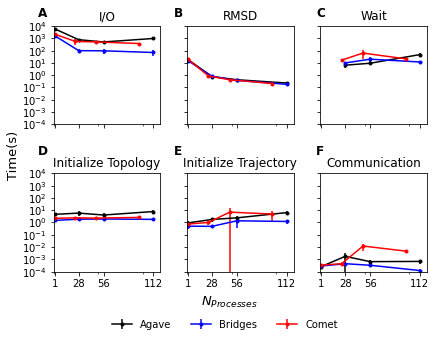

In [8]:
make_components_plot(Agave_masked, Bridges_masked, Comet_masked, 
                     lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                     filename='figs/components-masked.pdf')

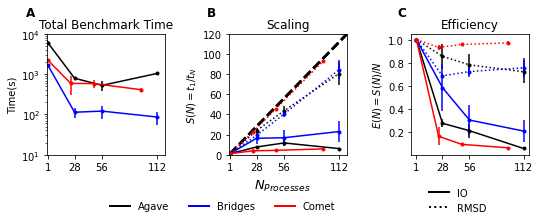

In [9]:
make_scaling_plot(Agave_masked, Bridges_masked, Comet_masked, 
                  lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                  filename='figs/scaling-masked.pdf')

## Memory plots

In [10]:
cols3 = ['Rank', 'Total_Initialize', 'Initialize_Topology', 
         'Initialize_Trajectory', 'Copy_to_Memory',
         'IO', 'IO/Frame', 'RMSD', 'RMSD/Frame', 
         'Wait', 'Comm_Gather', 'Close_Trajectory','Total_Benchmark_Time']

Agave_mem = Data('../Agave/benchmarks/in_memory/results/run_1', columns=cols3)
Bridges_mem = Data('../Bridges/benchmarks/in_memory/results/run_1', columns=cols3)
Comet_mem = Data('../Comet/benchmarks/in_memory/results/run_1', columns=cols3)

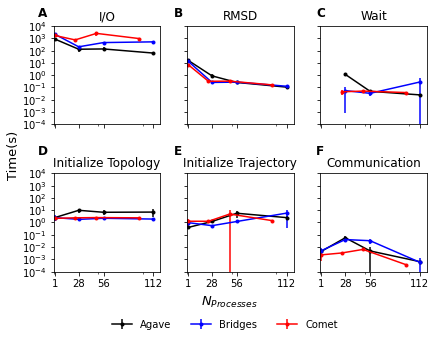

In [11]:
make_components_plot(Agave_mem, Bridges_mem, Comet_mem,
                     mem1=True, mem2=True, mem3=True, 
                     lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                     filename='figs/components-mem.pdf')

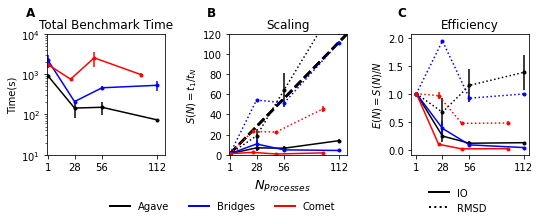

In [12]:
make_scaling_plot(Agave_mem, Bridges_mem, Comet_mem, mem=True, special=True,
                  lgd1='Agave', lgd2='Bridges', lgd3='Comet', 
                  filename='figs/scaling-mem.pdf')

## Comparison plots

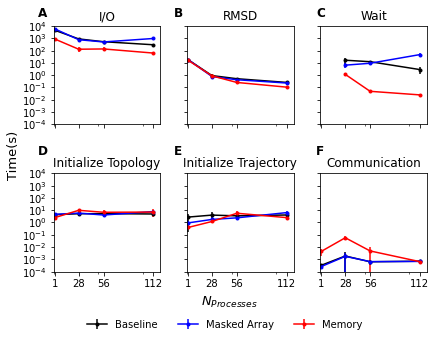

In [13]:
make_components_plot(Agave_vanilla, Agave_masked, Agave_mem,
                     mem3=True, 
                     lgd1='Baseline', lgd2='Masked Array', lgd3='Memory', 
                     filename='figs/optimization-comparison.pdf')

## Chunking plots

In [14]:
Agave_contiguous = Data('../Agave/benchmarks/contiguous/results/run_1', columns=cols2)
Agave_chunked = Data('../Agave/benchmarks/chunked/results/run_1', columns=cols2)

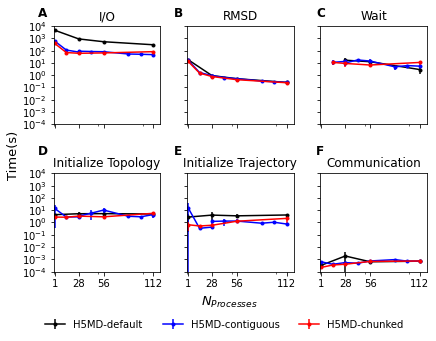

In [15]:
make_components_plot(Agave_vanilla, Agave_contiguous, Agave_chunked, 
                     lgd1='H5MD-default', lgd2='H5MD-contiguous', lgd3='H5MD-chunked', 
                     filename='figs/components-chunk.pdf')

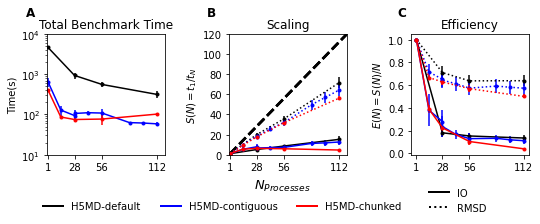

In [16]:
make_scaling_plot(Agave_vanilla, Agave_contiguous, Agave_chunked, 
                  lgd1='H5MD-default', lgd2='H5MD-contiguous', lgd3='H5MD-chunked', 
                  filename='figs/scaling-chunk.pdf')

## Compression plots

In [17]:
Agave_gzip1 = Data('../Agave/benchmarks/vanilla_gzip_1/results/run_1', columns=cols2)
Agave_gzip9 = Data('../Agave/benchmarks/vanilla_gzip_9/results/run_1', columns=cols2)

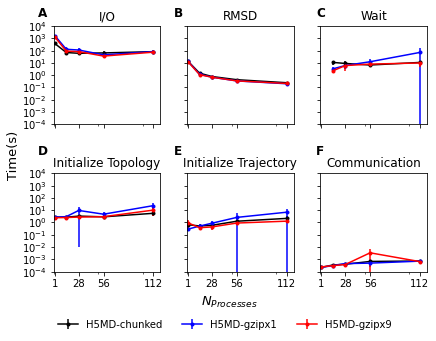

In [18]:
make_components_plot(Agave_chunked, Agave_gzip1, Agave_gzip9, 
                     lgd1='H5MD-chunked', lgd2='H5MD-gzipx1', lgd3='H5MD-gzipx9', 
                     filename='figs/components-gzip.pdf')

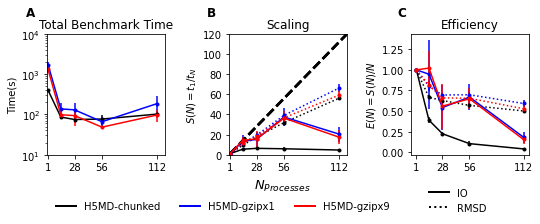

In [19]:
make_scaling_plot(Agave_chunked, Agave_gzip1, Agave_gzip9, 
                  lgd1='H5MD-chunked', lgd2='H5MD-gzipx1', lgd3='H5MD-gzipx9', 
                  filename='figs/scaling-gzip.pdf')